In [2]:
import sys
import os
import glob
import random
import time

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

plt.style.use("dark_background")

# Loading Data

In [3]:
DATA_PATH = "./archive/kaggle_3m/" 
BASE_LEN = 64
END_IMG_LEN = 4
END_MASK_LEN = 9

IMG_SIZE = 512

In [4]:
data_map = []
for sub_dir_path in glob.glob(DATA_PATH+"*"):
    if os.path.isdir(sub_dir_path):
        dirname = sub_dir_path.split("/")[-1]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + "/" + filename
            data_map.extend([dirname, image_path])
    else:
        print("This is not a dir:", sub_dir_path)
        

This is not a dir: ./archive/kaggle_3m/data.csv
This is not a dir: ./archive/kaggle_3m/README.md


In [5]:
df = pd.DataFrame({"dirname" : data_map[::2], "path" : data_map[1::2]})
df.head()

dirname                                               path
0  TCGA_CS_6667_20011105  ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA...
1  TCGA_CS_6667_20011105  ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA...
2  TCGA_CS_6667_20011105  ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA...
3  TCGA_CS_6667_20011105  ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA...
4  TCGA_CS_6667_20011105  ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA...

In [6]:
df_imgs = df[~df['path'].str.contains("mask")]
df_masks = df[df['path'].str.contains("mask")]

In [7]:
#sort imags and masks by name and reindex them from 0
imgs = df_imgs.sort_values(by=['path']).reset_index(drop=True)
masks = df_masks.sort_values(by=['path']).reset_index(drop=True)

imgs = imgs['path'].to_numpy()
masks = masks['path'].to_numpy()


In [8]:


imgs = sorted(df_imgs["path"].values, key=lambda x : int(x[BASE_LEN:-END_IMG_LEN]))
masks = sorted(df_masks["path"].values, key=lambda x : int(x[BASE_LEN:-END_MASK_LEN]))

# temp = df_imgs["path"].values[0]
# print(temp)
# temp[64:-END_IMG_LEN]

In [9]:
print("Path to the Image:", imgs[0], "\nPath to the Mask:", masks[0])

Path to the Image: ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_1.tif 
Path to the Mask: ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_1_mask.tif


In [10]:
df = pd.DataFrame({"patient": df_imgs.dirname.values, "image_path": imgs, "mask_path": masks})

In [11]:
def classify_image(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 : return 1
    else: return 0

In [12]:
df["diagnosis"] = df["mask_path"].apply(lambda m: classify_image(m))
df

patient  \
0     TCGA_CS_6667_20011105   
1     TCGA_CS_6667_20011105   
2     TCGA_CS_6667_20011105   
3     TCGA_CS_6667_20011105   
4     TCGA_CS_6667_20011105   
...                     ...   
3924  TCGA_FG_A60K_20040224   
3925  TCGA_FG_A60K_20040224   
3926  TCGA_FG_A60K_20040224   
3927  TCGA_FG_A60K_20040224   
3928  TCGA_FG_A60K_20040224   

                                             image_path  \
0     ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA...   
1     ./archive/kaggle_3m/TCGA_DU_8164_19970111/TCGA...   
2     ./archive/kaggle_3m/TCGA_DU_8168_19970503/TCGA...   
3     ./archive/kaggle_3m/TCGA_DU_7300_19910814/TCGA...   
4     ./archive/kaggle_3m/TCGA_HT_7475_19970918/TCGA...   
...                                                 ...   
3924  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...   
3925  ./archive/kaggle_3m/TCGA_HT_A61B_19991127/TCGA...   
3926  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...   
3927  ./archive/kaggle_3m/TCGA_HT_A61B_19991127/TCGA...   
3928  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...   

                                              mask_path  diagnosis  
0     ./archive/kaggle_3m/TCGA_CS_6667_20011105/TCGA...          0  
1     ./archive/kaggle_3m/TCGA_DU_8164_19970111/TCGA...          0  
2     ./archive/kaggle_3m/TCGA_DU_8168_19970503/TCGA...          0  
3     ./archive/kaggle_3m/TCGA_DU_7300_19910814/TCGA...          0  
4     ./archive/kaggle_3m/TCGA_HT_7475_19970918/TCGA...          0  
...                                                 ...        ...  
3924  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...          0  
3925  ./archive/kaggle_3m/TCGA_HT_A61B_19991127/TCGA...          0  
3926  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...          0  
3927  ./archive/kaggle_3m/TCGA_HT_A61B_19991127/TCGA...          0  
3928  ./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA...          0  

[3929 rows x 4 columns]

# Data Distribution

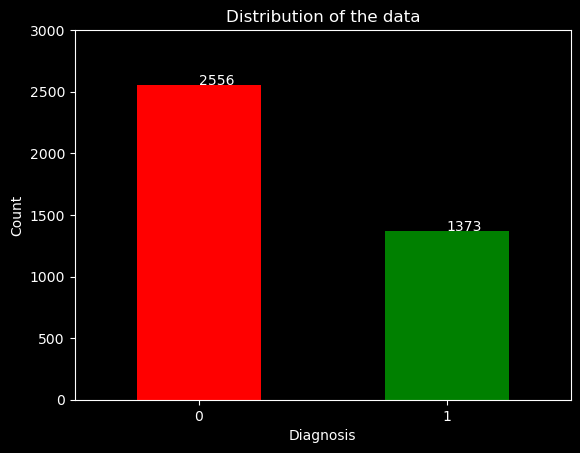

In [13]:
#plotting the distribution of the data
df["diagnosis"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Distribution of the data")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(rotation=0)
for index, value in enumerate(df["diagnosis"].value_counts()):
    plt.text(index, value, str(value))
plt.ylim(0, 3000)
plt.show()

In [14]:
patients_by_diagnosis = df.groupby(['patient', 'diagnosis'])['diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

In [15]:
patients_by_diagnosis.head()

Positive  Negative
patient                                  
TCGA_CS_4941_19960909      14.0       9.0
TCGA_CS_4942_19970222      13.0       7.0
TCGA_CS_4943_20000902       9.0      11.0
TCGA_CS_4944_20010208      11.0       9.0
TCGA_CS_5393_19990606       8.0      12.0

Text(0.5, 1.005, 'Distribution of data grouped by patient and diagnosis')

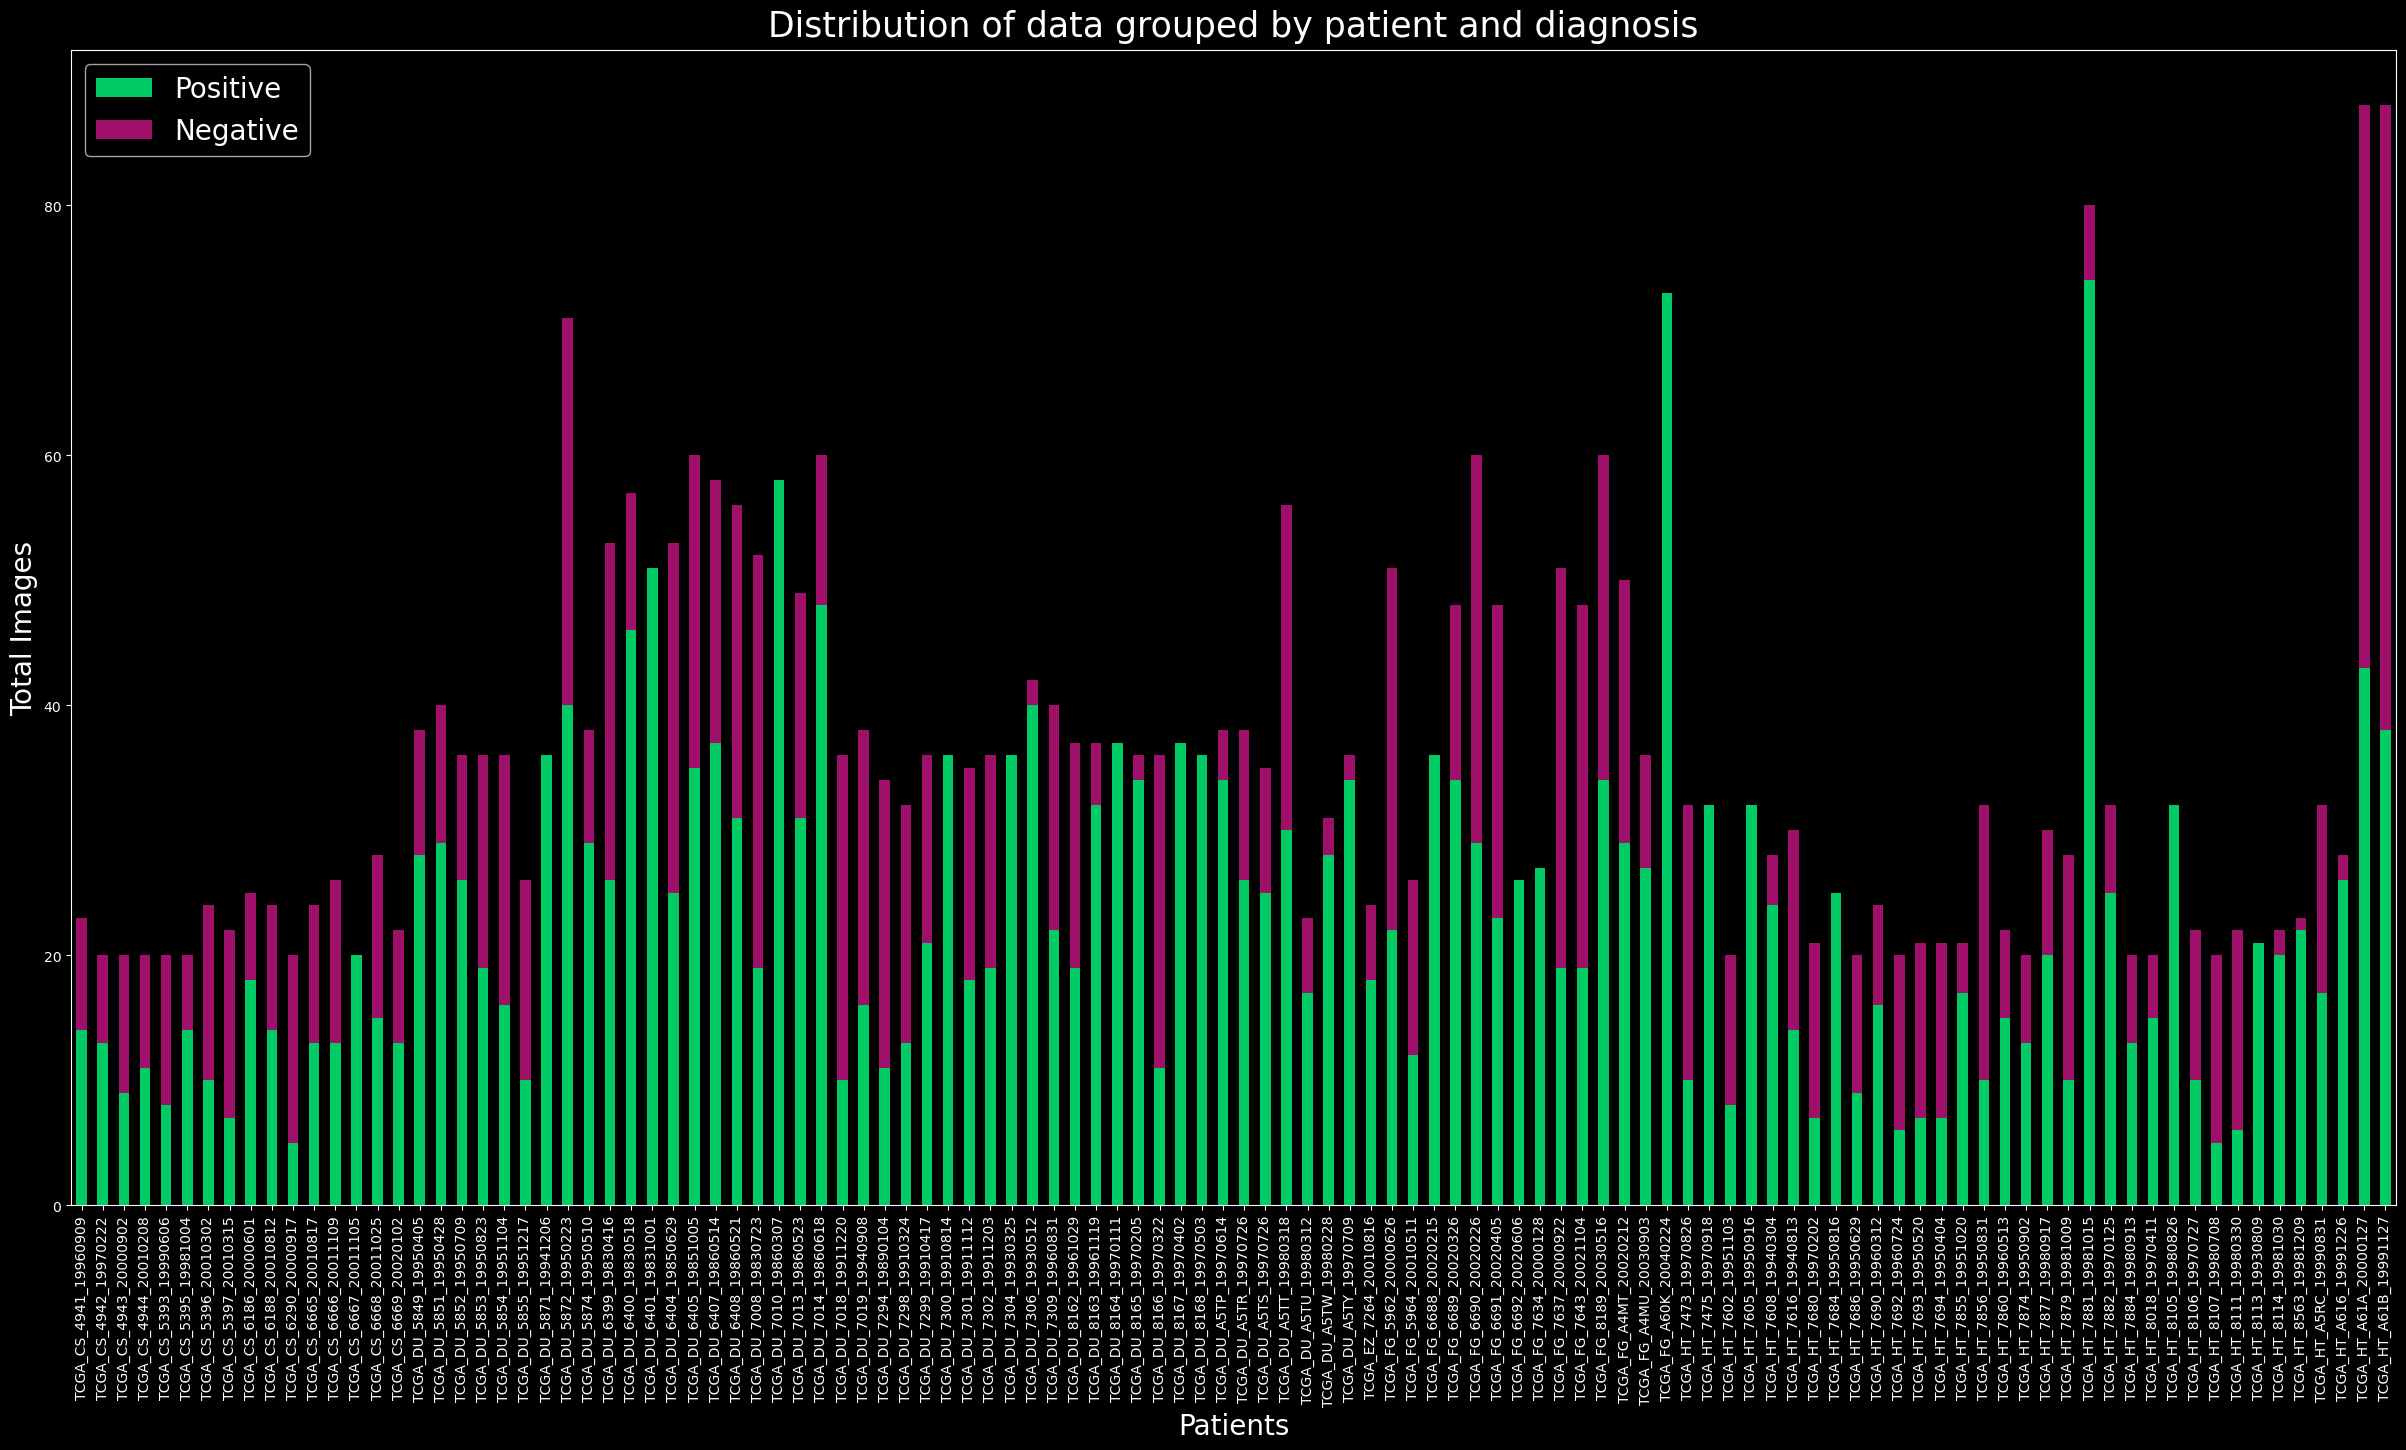

In [16]:
ax = patients_by_diagnosis.plot(kind='bar',stacked=True, figsize=(30, 15), color=["springgreen", "mediumvioletred"], alpha=0.8)
ax.legend(fontsize=20)
ax.set_xlabel('Patients',fontsize = 20)
ax.set_ylabel('Total Images', fontsize = 20)
#add the final y value of each bar
# for p in ax.patches:
#     ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_title("Distribution of data grouped by patient and diagnosis",fontsize = 25, y=1.005)

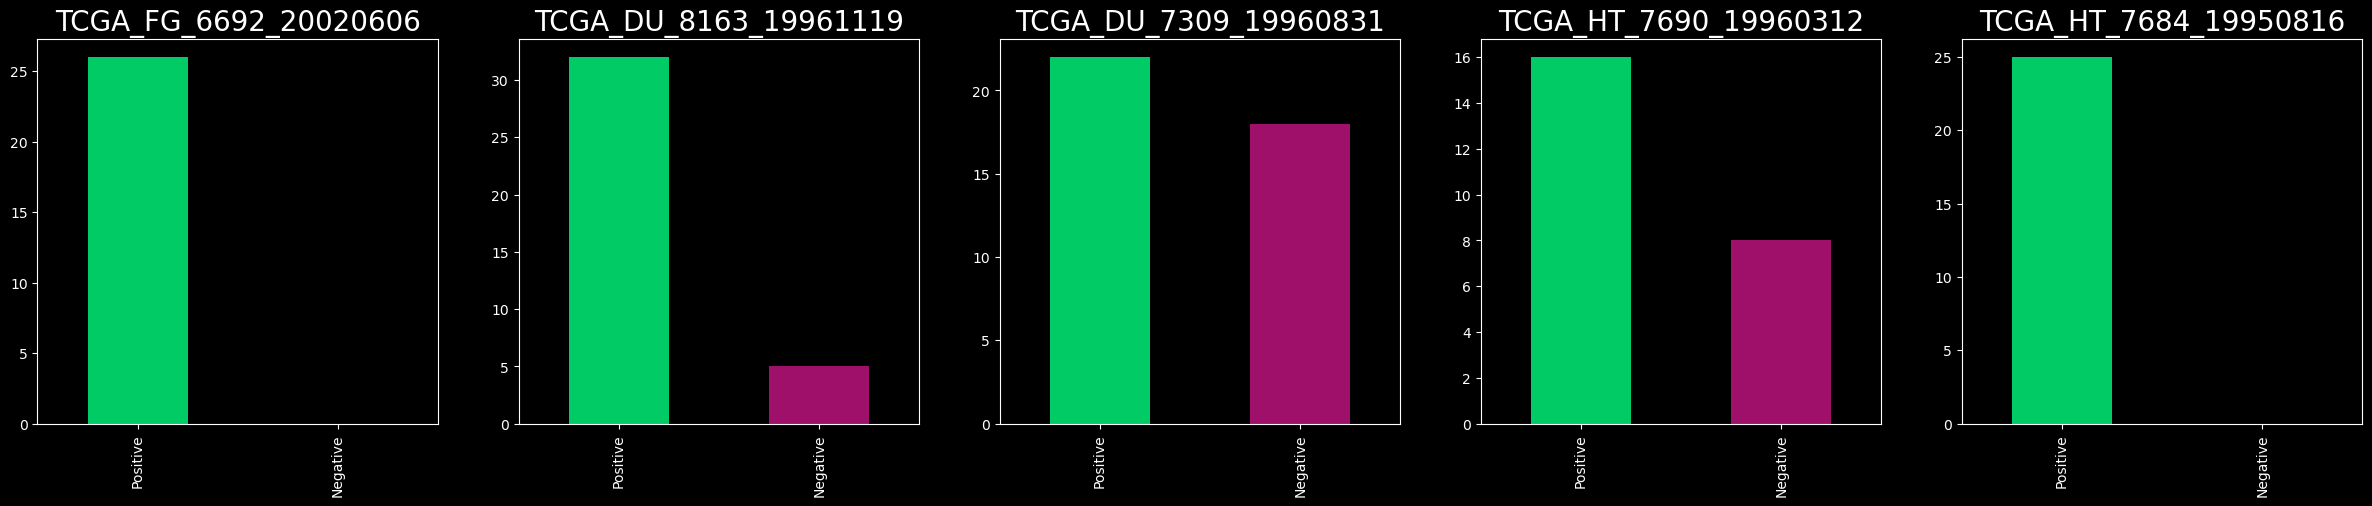

In [17]:
#draw subplots for 5 random patients diagnosis
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
for i in range(5):
    patient = random.choice(patients_by_diagnosis.index)
    patients_by_diagnosis.loc[patient].plot(kind='bar', ax=ax[i], color=["springgreen", "mediumvioletred"], alpha=0.8)
    ax[i].set_title(patient, fontsize=20)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")


# Data Visualization

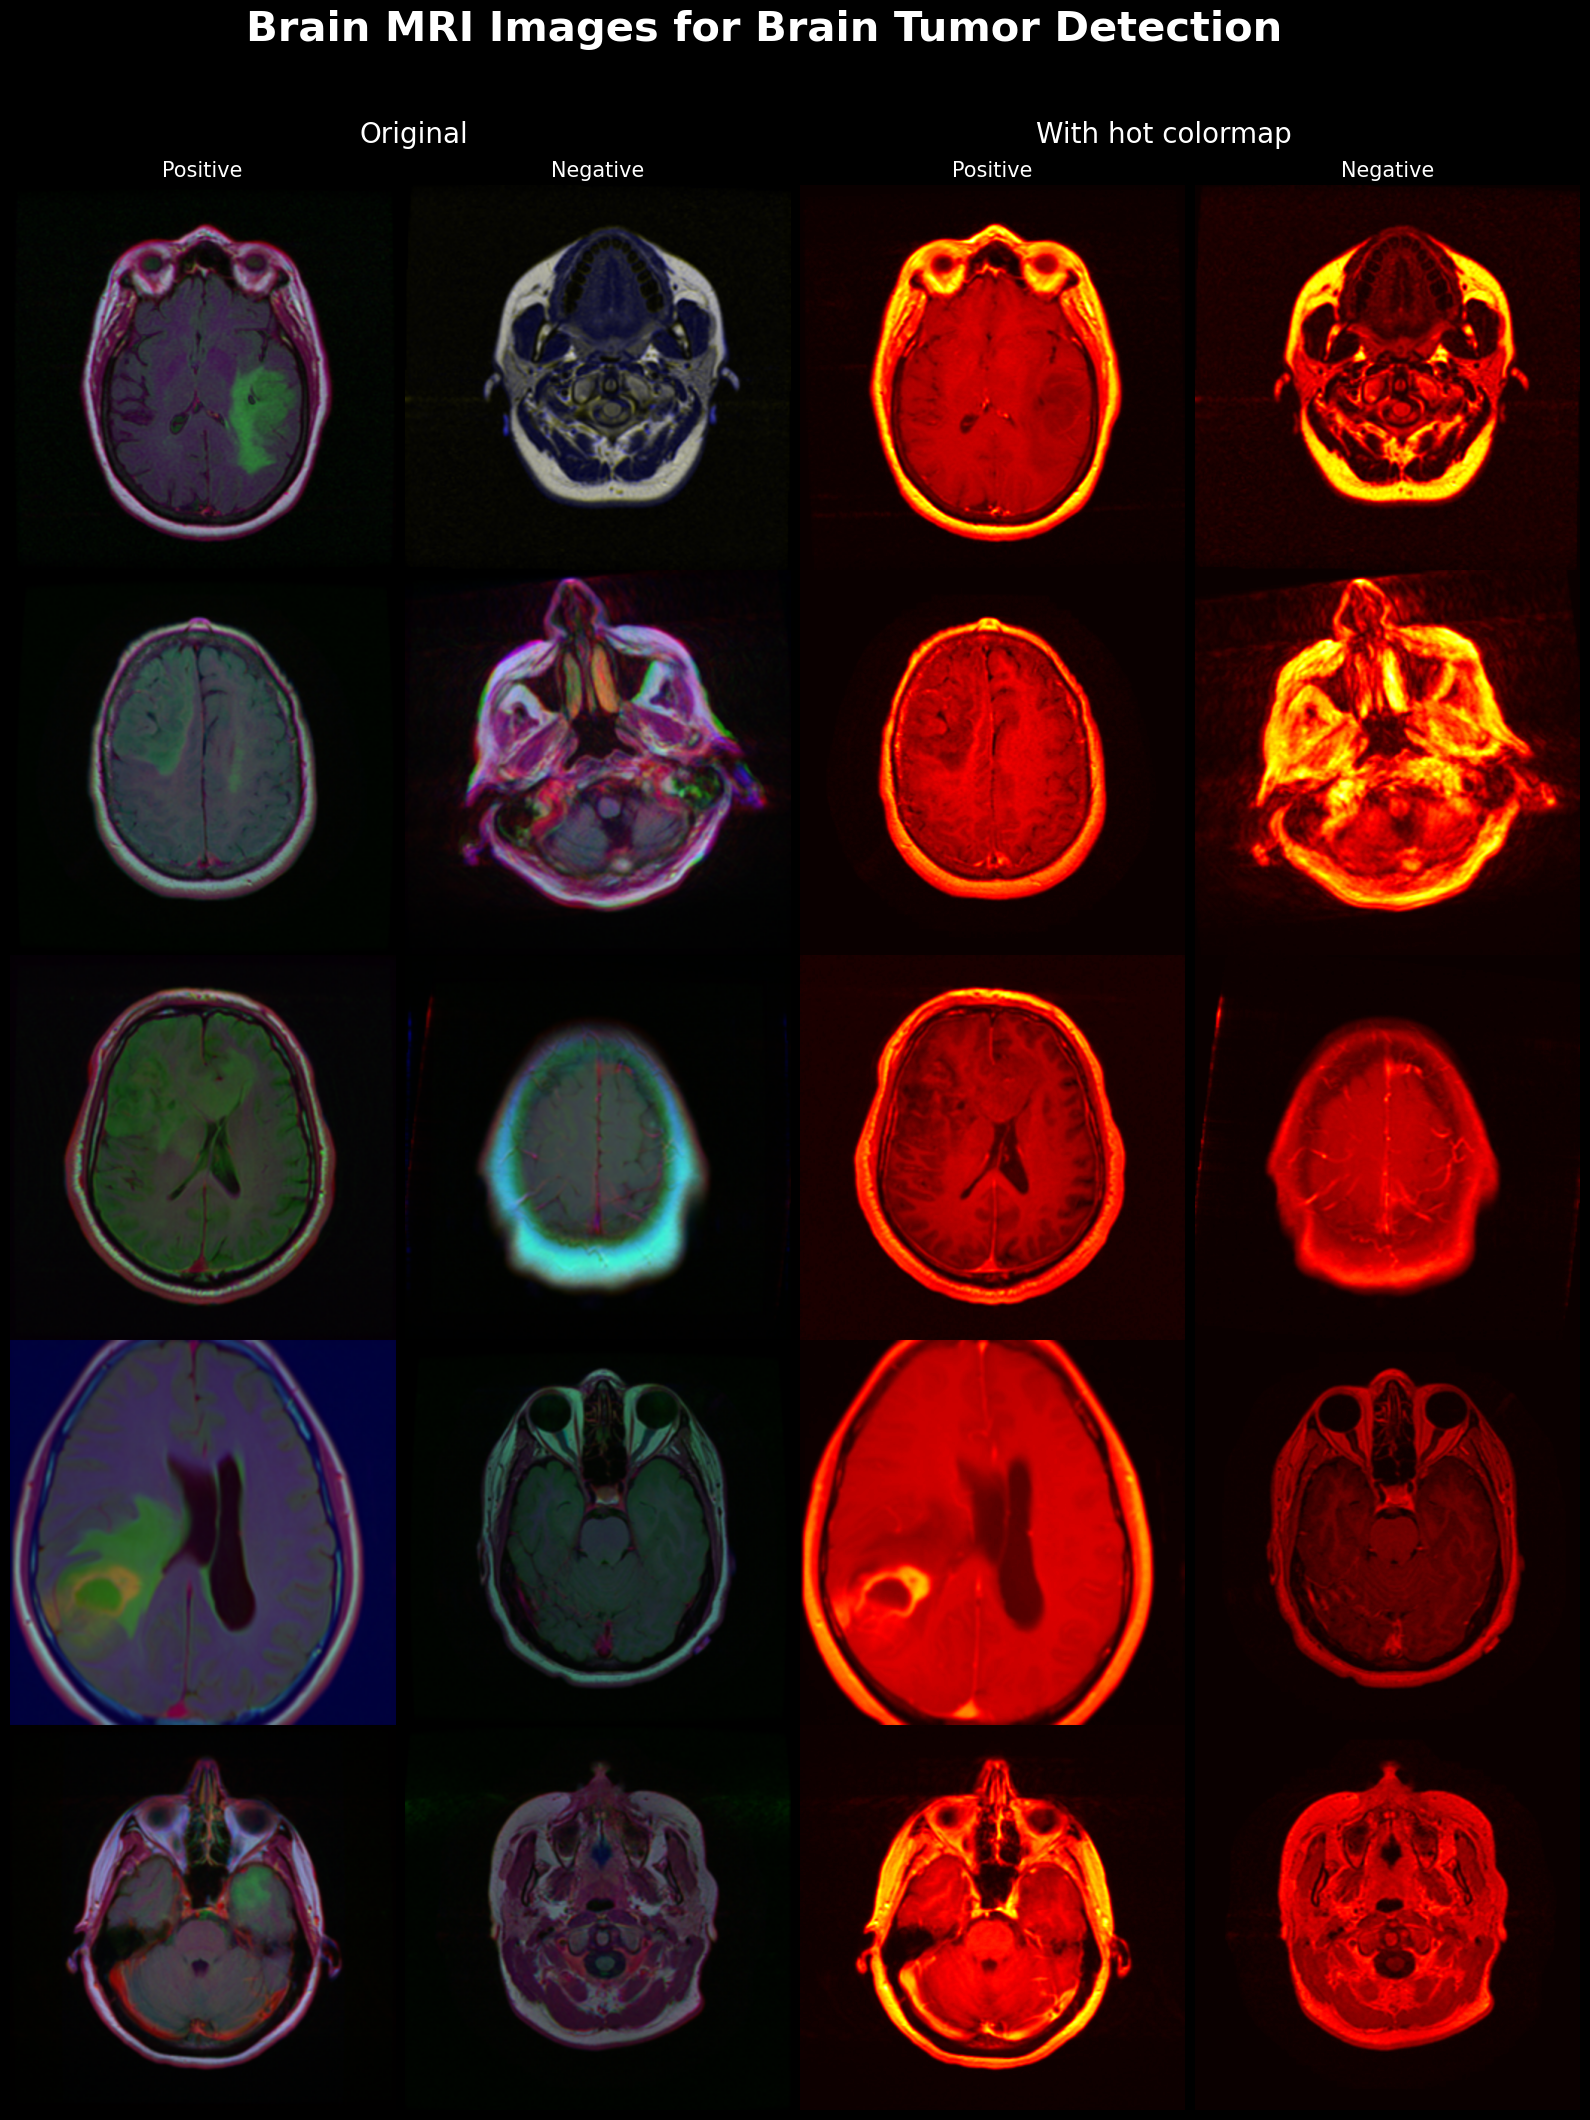

In [18]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Data
sample_yes_df = df[df["diagnosis"] == 1].sample(5).image_path.values
sample_no_df = df[df["diagnosis"] == 0].sample(5).image_path.values

sample_imgs = []
for i, (yes, no) in enumerate(zip(sample_yes_df, sample_no_df)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([yes, no])


sample_yes_arr = np.vstack(np.array(sample_imgs[::2]))
sample_no_arr = np.vstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_yes_arr)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_no_arr)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")

grid[2].imshow(sample_yes_arr[:,:,0], cmap="hot")
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(sample_no_arr[:,:,0], cmap="hot")
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")#set_title("No", fontsize=15)

# annotations
plt.figtext(0.36,0.90,"Original", va="center", ha="center", size=20)
plt.figtext(0.66,0.90,"With hot colormap", va="center", ha="center", size=20)
plt.suptitle("Brain MRI Images for Brain Tumor Detection", y=.95, fontsize=30, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight', pad_inches=0.2, transparent=True)
plt.show()

In [19]:
sample_df = df[df["diagnosis"] == 1].sample(5).values
sample_imgs = []
for i, data in enumerate(sample_df):
    #print(data)
    img = cv2.resize(cv2.imread(data[1]), (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(cv2.imread(data[2]), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([img, mask])


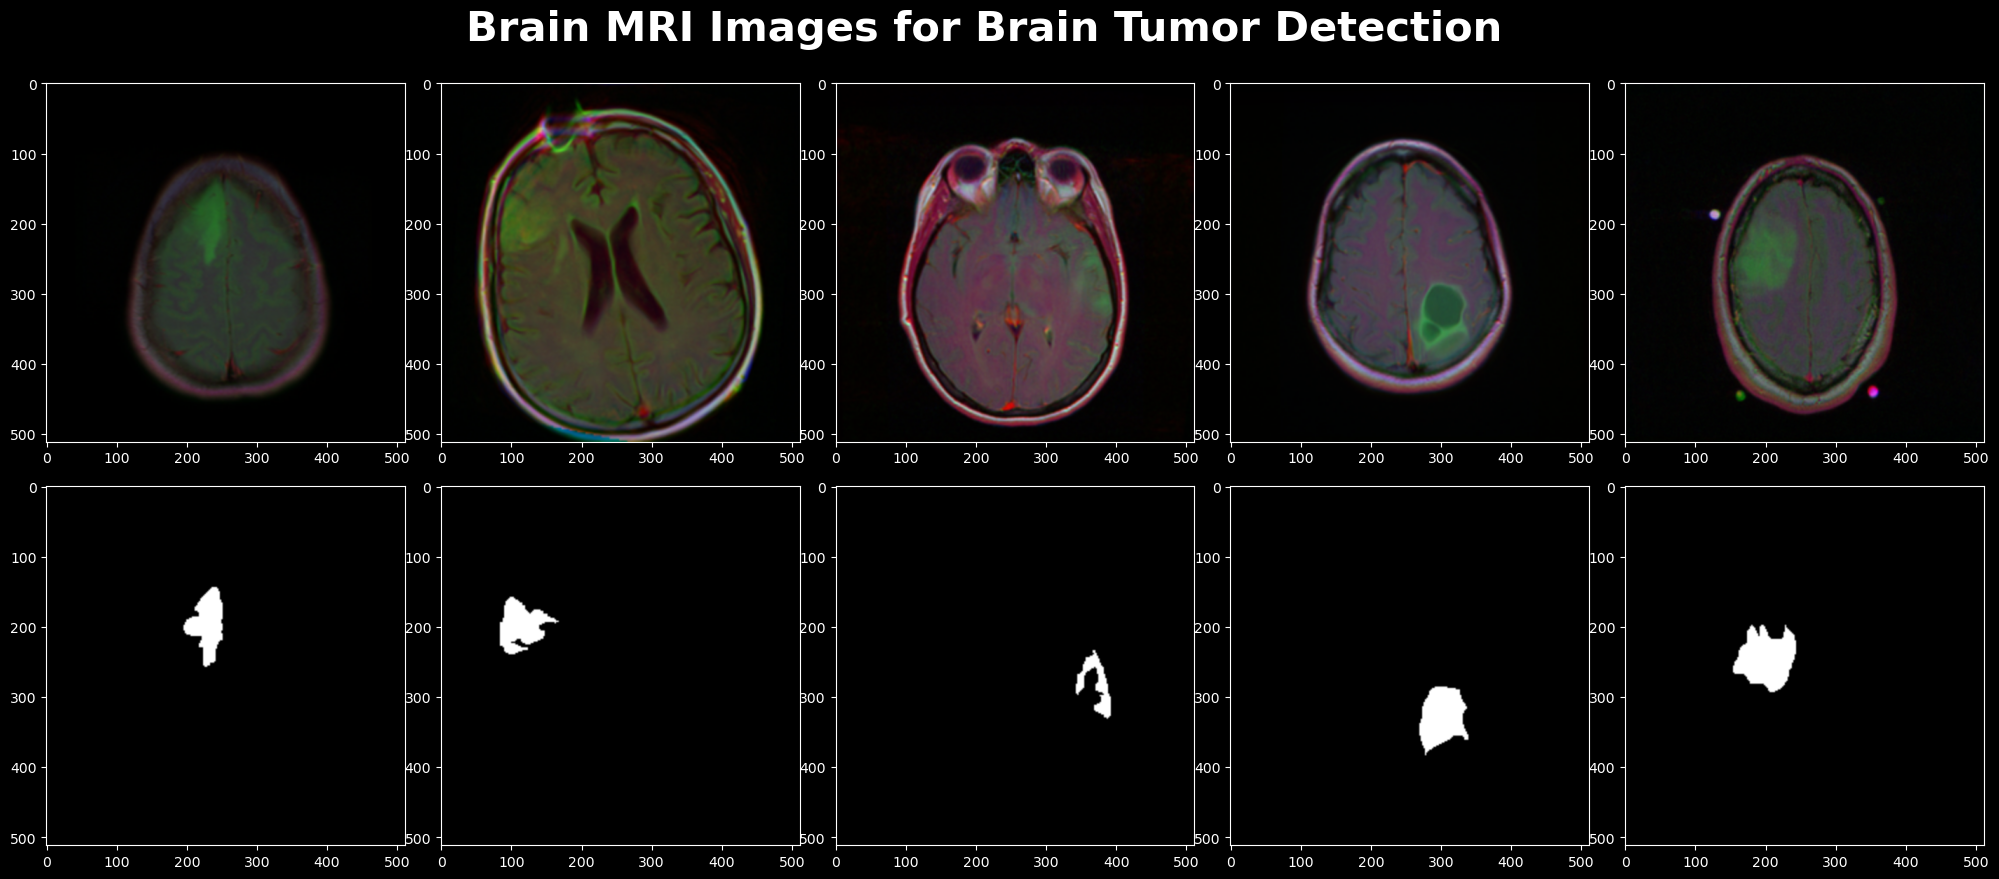

In [20]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
fig.suptitle("Brain MRI Images for Brain Tumor Detection", y=.95, fontsize=30, weight="bold")
for i in range(5):
    ax[0, i].imshow(sample_imgs[2*i])
    ax[0, i].axis("on")
    ax[1, i].imshow(sample_imgs[2*i+1])
    ax[1, i].axis("on")


In [21]:
cv2.imread(df.iloc[1,2]).shape

(256, 256, 3)

In [22]:
cv2.imread(self.df.iloc[idx, 1])

NameError: name 'self' is not defined

# Data Augmentation

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import albumentations as A
#from albumentations.pytorch import ToTensor, ToTensorV2
from albumentations.pytorch import ToTensorV2

from sklearn.model_selection import train_test_split

In [24]:
# For Mac with M1
#device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
#For Cuda
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device("cpu")

Data Generator

In [25]:
# class BrainMriDataset(Dataset):
#     def __init__(self, df, transforms):
        
#         self.df = df
#         self.transforms = transforms
        
#     def __len__(self):
#         return len(self.df)
    
#     def __getitem__(self, idx):
#         image = cv2.imread(self.df.iloc[idx, 1])
#         mask = cv2.imread(self.df.iloc[idx, 2], 0)

#         augmented = self.transforms(image=image, 
#                                     mask=mask)
 
#         image = augmented['image']
#         mask = augmented['mask']   
        
#         return image, mask
    
#         # unnormilize mask
#         #mask = torch.clamp(mask.float(), min=0, max=1)
#         #mask = torch.ceil(mask)       

In [26]:
PATCH_SIZE = 128#256

strong_transforms = A.Compose([
    A.RandomResizedCrop(width = PATCH_SIZE, height = PATCH_SIZE, p=1.0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Transpose(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),
    
    # Pixels
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p=0.25),
    A.Emboss(p=0.25),
    A.Blur(p=0.01, blur_limit = 3),
    
    # Affine
    A.OneOf([
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)                  
    ], p=0.8),
    
    
    A.Normalize(p=1.0),
    #https://albumentations.readthedocs.io/en/latest/api/pytorch.html?highlight=ToTensor#albumentations.pytorch.transforms.ToTensor
    ToTensorV2(),
])


transforms = A.Compose([
    A.Resize(width = PATCH_SIZE, height = PATCH_SIZE, p=1.0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Transpose(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),

    
    
    A.Normalize(p=1.0),
    ToTensorV2(),
])

Train Test Split

In [27]:
# Split df into train_df and val_df
train_df, val_df = train_test_split(df, stratify=df.diagnosis, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
train_df, test_df = train_test_split(train_df, stratify=train_df.diagnosis, test_size=0.15)
train_df = train_df.reset_index(drop=True)

#train_df = train_df[:1000]
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (3005, 4) 
Val: (393, 4) 
Test: (531, 4)


In [46]:
from dataset import BrainMriDataset

In [47]:
# train
train_dataset = BrainMriDataset(df=train_df, transforms=transforms)
train_dataloader = DataLoader(train_dataset, batch_size=64, num_workers=4, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, transforms=transforms)
val_dataloader = DataLoader(val_dataset, batch_size=64, num_workers=4, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, transforms=transforms)
test_dataloader = DataLoader(test_dataset, batch_size=64, num_workers=4, shuffle=True)


In [48]:
print(train_dataset.__getitem__(2)[1].shape)
print(train_dataset.__getitem__(2)[0].shape)
a = torch.unsqueeze(train_dataset.__getitem__(1)[1],0)
a.shape

torch.Size([1, 128, 128])
torch.Size([3, 128, 128])


torch.Size([1, 1, 128, 128])

In [49]:
train_dataloader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

image size: torch.Size([64, 3, 128, 128])
mask size: torch.Size([64, 1, 128, 128])
torch.Size([64, 3, 128, 128]) torch.Size([64, 1, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


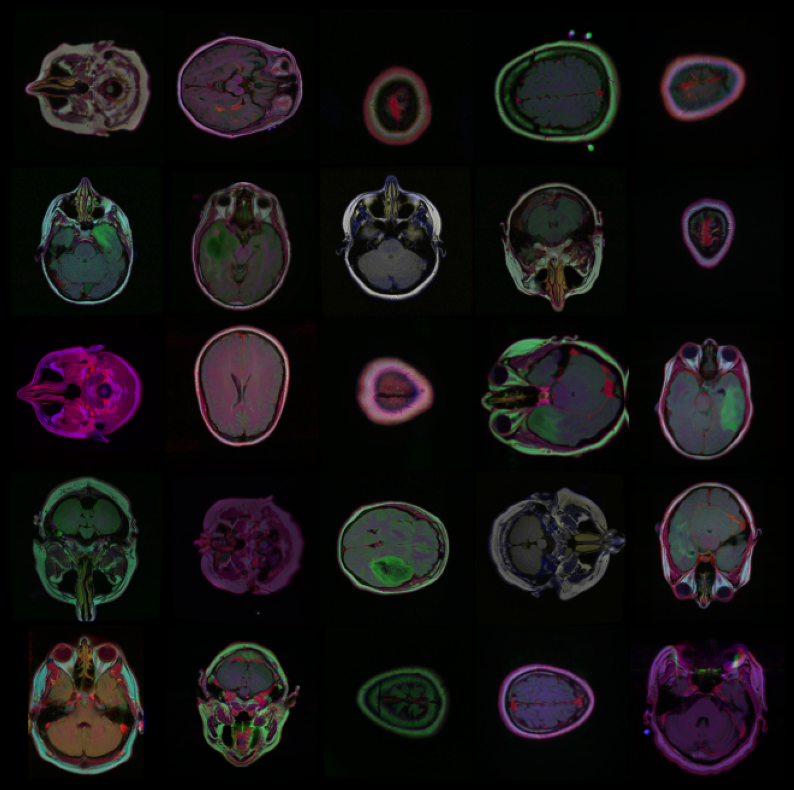

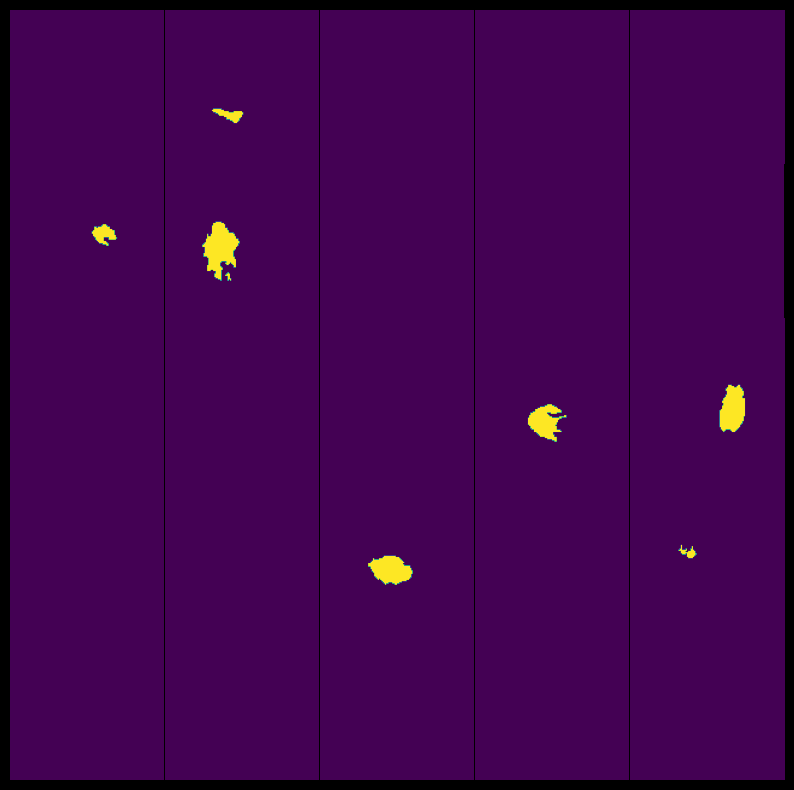

In [50]:
def show_aug(inputs, nrows=5, ncols=5, image=True):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0., hspace=0.)
    i_ = 0
    
    if len(inputs) > 25:
        inputs = inputs[:25]
        
    for idx in range(len(inputs)):
    
        # normalization
        if image is True:           
            img = inputs[idx].numpy().transpose(1,2,0)
            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225] 
            img = (img*std+mean).astype(np.float32)
        else:
            img = inputs[idx].numpy().astype(np.float32)
            #print(img.shape)
            img = img[0,:,:]
        
        #plot
        #print(img.max(), len(np.unique(img)))
        plt.subplot(nrows, ncols, i_+1)
        plt.imshow(img); 
        plt.axis('off')
 
        i_ += 1
        
    return plt.show()

    
images, masks = next(iter(train_dataloader))
print("image size:", images.shape)
print("mask size:", masks.shape)
print(images.shape, masks.shape)

show_aug(images)
show_aug(masks, image=False)

## Unet

In [51]:
# define the number of channels in the input, number of classes,
# and number of levels in the U-Net model
NUM_CHANNELS = 1
NUM_CLASSES = 1
NUM_LEVELS = 3
# initialize learning rate, number of epochs to train for, and the
# batch size
INIT_LR = 0.001
NUM_EPOCHS = 40
BATCH_SIZE = 64
# define the input image dimensions
INPUT_IMAGE_WIDTH = 128
INPUT_IMAGE_HEIGHT = 128
# define threshold to filter weak predictions
THRESHOLD = 0.5

In [52]:
from torch.nn import ConvTranspose2d
from torch.nn import Conv2d
from torch.nn import MaxPool2d
from torch.nn import Module
from torch.nn import ModuleList
from torch.nn import ReLU
from torchvision.transforms import CenterCrop
from torch.nn import functional as F
import torch

In [53]:
class Block(Module):
	def __init__(self, inChannels, outChannels):
		super().__init__()
		# store the convolution and RELU layers
		self.conv1 = Conv2d(inChannels, outChannels, 3)
		self.relu = ReLU()
		self.conv2 = Conv2d(outChannels, outChannels, 3)
	def forward(self, x):
		# apply CONV => RELU => CONV block to the inputs and return it
		return self.conv2(self.relu(self.conv1(x)))

In [54]:
class Encoder(Module):
	def __init__(self, channels=(3, 16, 32, 64)):
		super().__init__()
		# store the encoder blocks and maxpooling layer
		self.encBlocks = ModuleList(
			[Block(channels[i], channels[i + 1])
			 	for i in range(len(channels) - 1)])
		self.pool = MaxPool2d(2)
	def forward(self, x):
		# initialize an empty list to store the intermediate outputs
		blockOutputs = []
		# loop through the encoder blocks
		for block in self.encBlocks:
			# pass the inputs through the current encoder block, store
			# the outputs, and then apply maxpooling on the output
			x = block(x)
			blockOutputs.append(x)
			x = self.pool(x)
		# return the list containing the intermediate outputs
		return blockOutputs

In [55]:
class Decoder(Module):
	def __init__(self, channels=(64, 32, 16)):
		super().__init__()
		# initialize the number of channels, upsampler blocks, and
		# decoder blocks
		self.channels = channels
		self.upconvs = ModuleList(
			[ConvTranspose2d(channels[i], channels[i + 1], 2, 2)
			 	for i in range(len(channels) - 1)])
		self.dec_blocks = ModuleList(
			[Block(channels[i], channels[i + 1])
			 	for i in range(len(channels) - 1)])
	def forward(self, x, encFeatures):
		# loop through the number of channels
		for i in range(len(self.channels) - 1):
			# pass the inputs through the upsampler blocks
			x = self.upconvs[i](x)
			# crop the current features from the encoder blocks,
			# concatenate them with the current upsampled features,
			# and pass the concatenated output through the current
			# decoder block
			encFeat = self.crop(encFeatures[i], x)
			x = torch.cat([x, encFeat], dim=1)
			x = self.dec_blocks[i](x)
		# return the final decoder output
		return x
	def crop(self, encFeatures, x):
		# grab the dimensions of the inputs, and crop the encoder
		# features to match the dimensions
		(_, _, H, W) = x.shape
		encFeatures = CenterCrop([H, W])(encFeatures)
		# return the cropped features
		return encFeatures

In [56]:
class UNet(Module):
	def __init__(self, encChannels=(3, 16, 32, 64),
		 decChannels=(64, 32, 16),
		 nbClasses=1, retainDim=True,
		 outSize=(INPUT_IMAGE_HEIGHT,  INPUT_IMAGE_WIDTH)):
		super().__init__()
		# initialize the encoder and decoder
		self.encoder = Encoder(encChannels)
		self.decoder = Decoder(decChannels)
		# initialize the regression head and store the class variables
		self.head = Conv2d(decChannels[-1], nbClasses, 1)
		self.retainDim = retainDim
		self.outSize = outSize
	def forward(self, x):
		# grab the features from the encoder
		encFeatures = self.encoder(x)
		# pass the encoder features through decoder making sure that
		# their dimensions are suited for concatenation
		decFeatures = self.decoder(encFeatures[::-1][0],
			encFeatures[::-1][1:])
		# pass the decoder features through the regression head to
		# obtain the segmentation mask
		map = self.head(decFeatures)
		# check to see if we are retaining the original output
		# dimensions and if so, then resize the output to match them
		if self.retainDim:
			map = F.interpolate(map, self.outSize)
		# return the segmentation map
		return map

In [57]:
unet = UNet().to(device)


In [58]:
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

In [59]:
# initialize loss function and optimizer
lossFunc = BCEWithLogitsLoss()
opt = Adam(unet.parameters(), lr=INIT_LR)
# calculate steps per epoch for training and test set
trainSteps = len(train_dataset) // BATCH_SIZE
testSteps = len(test_dataset) // BATCH_SIZE
# initialize a dictionary to store training history
H = {"train_loss": [], "test_loss": []}

In [60]:
from tqdm import tqdm

In [62]:
# loop over epochs
print("[INFO] training the network...")
startTime = time.time()
for e in tqdm(range(NUM_EPOCHS)):
	# set the model in training mode
	unet.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalTestLoss = 0
	# loop over the training set
	for (i, (x, y)) in enumerate(train_dataloader):
		# send the input to the device
		(x, y) = (x.to(device), y.to(device))
		# perform a forward pass and calculate the training loss
		pred = unet(x)
		loss = lossFunc(pred, y.float())
		# first, zero out any previously accumulated gradients, then
		# perform backpropagation, and then update model parameters
		opt.zero_grad()
		loss.backward()
		opt.step()
		# add the loss to the total training loss so far
		totalTrainLoss += loss
	# switch off autograd
	with torch.no_grad():
		# set the model in evaluation mode
		unet.eval()
		# loop over the validation set
		for (x, y) in test_dataloader:
			# send the input to the device
			(x, y) = (x.to(device), y.to(device))
			# make the predictions and calculate the validation loss
			pred = unet(x)
			totalTestLoss += lossFunc(pred, y.float())
	# calculate the average training and validation loss
	avgTrainLoss = totalTrainLoss / trainSteps
	avgTestLoss = totalTestLoss / testSteps
	# update our training history
	H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
	H["test_loss"].append(avgTestLoss.cpu().detach().numpy())
	# print the model training and validation information
	print("[INFO] EPOCH: {}/{}".format(e + 1, NUM_EPOCHS))
	print("Train loss: {:.6f}, Test loss: {:.4f}".format(
		avgTrainLoss, avgTestLoss))
# display the total time needed to perform the training
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))

[INFO] training the network...


  2%|▎         | 1/40 [02:16<1:28:43, 136.51s/it]

[INFO] EPOCH: 1/40
Train loss: -18743902.000000, Test loss: -349084736.0000


  5%|▌         | 2/40 [04:35<1:27:23, 137.98s/it]

[INFO] EPOCH: 2/40
Train loss: -10211553181696.000000, Test loss: -123374630076416.0000


  8%|▊         | 3/40 [06:56<1:25:50, 139.20s/it]

[INFO] EPOCH: 3/40
Train loss: -36780609569292288.000000, Test loss: -339331897039519744.0000


 10%|█         | 4/40 [09:25<1:25:59, 143.33s/it]

[INFO] EPOCH: 4/40
Train loss: -15738731596892602368.000000, Test loss: -78056204023631970304.0000


 12%|█▎        | 5/40 [11:47<1:23:19, 142.85s/it]

[INFO] EPOCH: 5/40
Train loss: -1274294499726900330496.000000, Test loss: -5885920986196713930752.0000


 15%|█▌        | 6/40 [14:08<1:20:34, 142.18s/it]

[INFO] EPOCH: 6/40
Train loss: -34615024772140008210432.000000, Test loss: -88228083751975617822720.0000


 18%|█▊        | 7/40 [16:26<1:17:24, 140.75s/it]

[INFO] EPOCH: 7/40
Train loss: -254356209280872878178304.000000, Test loss: -425528159226842235011072.0000


 18%|█▊        | 7/40 [18:19<1:26:22, 157.06s/it]


KeyboardInterrupt: 

In [59]:
def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True))

In [60]:
class UNet(nn.Module):

    def __init__(self, n_classes):
        super().__init__()
                
        self.conv_down1 = double_conv(3, 64)
        self.conv_down2 = double_conv(64, 128)
        self.conv_down3 = double_conv(128, 256)
        self.conv_down4 = double_conv(256, 512)        

        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)        
        
        self.conv_up3 = double_conv(256 + 512, 256)
        self.conv_up2 = double_conv(128 + 256, 128)
        self.conv_up1 = double_conv(128 + 64, 64)
        
        self.last_conv = nn.Conv2d(64, n_classes, kernel_size=1)
        
        
    def forward(self, x):
        # Batch - 1d tensor.  N_channels - 1d tensor, IMG_SIZE - 2d tensor.
        # Example: x.shape >>> (10, 3, 256, 256).
        
        conv1 = self.conv_down1(x)  # <- BATCH, 3, IMG_SIZE  -> BATCH, 64, IMG_SIZE..
        x = self.maxpool(conv1)     # <- BATCH, 64, IMG_SIZE -> BATCH, 64, IMG_SIZE 2x down.
        conv2 = self.conv_down2(x)  # <- BATCH, 64, IMG_SIZE -> BATCH,128, IMG_SIZE.
        x = self.maxpool(conv2)     # <- BATCH, 128, IMG_SIZE -> BATCH, 128, IMG_SIZE 2x down.
        conv3 = self.conv_down3(x)  # <- BATCH, 128, IMG_SIZE -> BATCH, 256, IMG_SIZE.
        x = self.maxpool(conv3)     # <- BATCH, 256, IMG_SIZE -> BATCH, 256, IMG_SIZE 2x down.
        x = self.conv_down4(x)      # <- BATCH, 256, IMG_SIZE -> BATCH, 512, IMG_SIZE.
        x = self.upsample(x)        # <- BATCH, 512, IMG_SIZE -> BATCH, 512, IMG_SIZE 2x up.
        
        #(Below the same)                                 N this       ==        N this.  Because the first N is upsampled.
        x = torch.cat([x, conv3], dim=1) # <- BATCH, 512, IMG_SIZE & BATCH, 256, IMG_SIZE--> BATCH, 768, IMG_SIZE.
        
        x = self.conv_up3(x) #  <- BATCH, 768, IMG_SIZE --> BATCH, 256, IMG_SIZE. 
        x = self.upsample(x)  #  <- BATCH, 256, IMG_SIZE -> BATCH,  256, IMG_SIZE 2x up.   
        x = torch.cat([x, conv2], dim=1) # <- BATCH, 256,IMG_SIZE & BATCH, 128, IMG_SIZE --> BATCH, 384, IMG_SIZE.  

        x = self.conv_up2(x) # <- BATCH, 384, IMG_SIZE --> BATCH, 128 IMG_SIZE. 
        x = self.upsample(x)   # <- BATCH, 128, IMG_SIZE --> BATCH, 128, IMG_SIZE 2x up.     
        x = torch.cat([x, conv1], dim=1) # <- BATCH, 128, IMG_SIZE & BATCH, 64, IMG_SIZE --> BATCH, 192, IMG_SIZE.  
        
        x = self.conv_up1(x) # <- BATCH, 128, IMG_SIZE --> BATCH, 64, IMG_SIZE.
        
        out = self.last_conv(x) # <- BATCH, 64, IMG_SIZE --> BATCH, n_classes, IMG_SIZE.
        out = torch.sigmoid(out)
        
        return out

In [61]:
unet = UNet(n_classes=1).to(device)
output = unet(torch.randn(1,3,256,256).to(device))
print("",output.shape)

 torch.Size([1, 1, 256, 256])


## Segmentation Metric

In [72]:
def dice_coef_metric(inputs, target):
    intersection = 2.0 * (target * inputs).sum()
    union = target.sum() + inputs.sum()
    if target.sum() == 0 and inputs.sum() == 0:
        return 1.0

    return intersection / union

# Metric check
dice_coef_metric(np.array([0., 0.9]), 
                 np.array([0., 1]))

0.9473684210526316

## Segmentation Loss

In [73]:
def dice_coef_loss(inputs, target):
    smooth = 1.0
    intersection = 2.0 * ((target * inputs).sum()) + smooth
    union = target.sum() + inputs.sum() + smooth

    return 1 - (intersection / union)


def bce_dice_loss(inputs, target):
    dicescore = dice_coef_loss(inputs, target)
    bcescore = nn.BCELoss()
    bceloss = bcescore(inputs, target)

    return bceloss + dicescore

# loss check
bce_dice_loss(torch.tensor([0.7, 1., 1.]), 
              torch.tensor([1.,1.,1.]))

tensor(0.1637)

In [74]:
def train_model(model_name, model, train_loader, val_loader, train_loss, optimizer, lr_scheduler, num_epochs):  
    
    print(model_name)
    loss_history = []
    train_history = []
    val_history = []

    for epoch in range(num_epochs):
        model.train() # Enter train mode
        
        losses = []
        train_iou = []
                
        if lr_scheduler:
            
            warmup_factor = 1.0 / 100
            warmup_iters = min(100, len(train_loader) - 1)
            lr_scheduler = warmup_lr_scheduler(optimizer, warmup_iters, warmup_factor)
        
        
        for i_step, (data, target) in enumerate(train_loader):
            data = data.to(device)
            target = target.to(device)
                      
            outputs = model(data)
            
            out_cut = np.copy(outputs.data.cpu().numpy())
            out_cut[np.nonzero(out_cut < 0.5)] = 0.0
            out_cut[np.nonzero(out_cut >= 0.5)] = 1.0
            
            train_dice = dice_coef_metric(out_cut, target.data.cpu().numpy())
            
            loss = train_loss(outputs.float(), target.float())
            
            losses.append(loss.item())
            train_iou.append(train_dice)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            if lr_scheduler:
                lr_scheduler.step()
 
        #torch.save(model.state_dict(), f'{model_name}_{str(epoch)}_epoch.pt')
        val_mean_iou = compute_iou(model, val_loader)
        
        loss_history.append(np.array(losses).mean())
        train_history.append(np.array(train_iou).mean())
        val_history.append(val_mean_iou)
        
        print("Epoch [%d]" % (epoch))
        print("Mean loss on train:", np.array(losses).mean(), 
              "\nMean DICE on train:", np.array(train_iou).mean(), 
              "\nMean DICE on validation:", val_mean_iou)
        
    return loss_history, train_history, val_history


def compute_iou(model, loader, threshold=0.3):
    """
    Computes accuracy on the dataset wrapped in a loader
    
    Returns: accuracy as a float value between 0 and 1
    """
    #model.eval()
    valloss = 0
    
    with torch.no_grad():

        for i_step, (data, target) in enumerate(loader):
            
            data = data.to(device)
            target = target.to(device)
            #prediction = model(x_gpu)
            
            outputs = model(data)
           # print("val_output:", outputs.shape)

            out_cut = np.copy(outputs.data.cpu().numpy())
            out_cut[np.nonzero(out_cut < threshold)] = 0.0
            out_cut[np.nonzero(out_cut >= threshold)] = 1.0

            picloss = dice_coef_metric(out_cut, target.data.cpu().numpy())
            valloss += picloss

        #print("Threshold:  " + str(threshold) + "  Validation DICE score:", valloss / i_step)

    return valloss / i_step

In [75]:
# Optimizers
unet_optimizer = torch.optim.Adamax(unet.parameters(), lr=1e-3)
#fpn_optimizer = torch.optim.Adamax(fpn.parameters(), lr=1e-3)
#rx50_optimizer = torch.optim.Adam(rx50.parameters(), lr=5e-4)

# lr_scheduler
def warmup_lr_scheduler(optimizer, warmup_iters, warmup_factor):
    def f(x):
        if x >= warmup_iters:
            return 1
        alpha = float(x) / warmup_iters
        return warmup_factor * (1 - alpha) + alpha

    return torch.optim.lr_scheduler.LambdaLR(optimizer, f)

In [76]:
%%time
num_ep = 10                                                                                                  
# Train UNet
unet_lh, unet_th, unet_vh = train_model("Vanila_UNet", unet, train_dataloader, val_dataloader, bce_dice_loss, unet_optimizer, False, 20) 

# Train FPN
#fpn_lh, fpn_th, fpn_vh = train_model("FPN", fpn, train_dataloader, val_dataloader, bce_dice_loss, fpn_optimizer, False, 20)#

# Train ResNeXt50
#rx50_lh, rx50_th, rx50_vh = train_model("ResNeXt50", rx50, train_dataloader, val_dataloader, bce_dice_loss, rx50_optimizer, False, num_ep)

Vanila_UNet
Epoch [0]
Mean loss on train: -154.2186395006158 
Mean DICE on train: 1.3751677015228072 
Mean DICE on validation: 1.431375350809506
Epoch [1]
Mean loss on train: -159.68597322291342 
Mean DICE on train: 1.3953432408756599 
Mean DICE on validation: 1.5504491881441254


In [ ]:
def plot_model_history(model_name,
                        train_history, val_history, 
                        num_epochs):
    
    x = np.arange(num_epochs)

    fig = plt.figure(figsize=(10, 6))
    plt.plot(x, train_history, label='train dice', lw=3, c="springgreen")
    plt.plot(x, val_history, label='validation dice', lw=3, c="deeppink")

    plt.title(f"{model_name}", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel("DICE", fontsize=15)

    fn = str(int(time.time())) + ".png"
    plt.show()
    #plt.savefig(fn, bbox_inches='tight', pad_inches=0.2)
    #plt.close()

In [ ]:
plot_model_history("Vanilla UNet", unet_th, unet_vh, 20)
#plot_model_history("FPN", fpn_th, fpn_vh, 20)
#plot_model_history("UNet with ResNeXt50 backbone", rx50_th, rx50_vh, num_ep)

In [ ]:
test_iou = compute_iou(unet, test_dataloader)
print(f"""Vanilla UNet\nMean IoU of the test images - {np.around(test_iou, 2)*100}%""")

#test_iou = compute_iou(fpn, test_dataloader)
#print(f"""FPN\nMean IoU of the test images - {np.around(test_iou, 2)*100}%""")

# test_iou = compute_iou(rx50, test_dataloader)
# print(f"""ResNext50\nMean IoU of the test images - {np.around(test_iou, 2)*100}%""")

In [ ]:
# image
test_sample = test_df[test_df["diagnosis"] == 1].sample(1).values[0]
image = cv2.resize(cv2.imread(test_sample[1]), (128, 128))

#mask
mask = cv2.resize(cv2.imread(test_sample[2]), (128, 128))

# pred
pred = torch.tensor(image.astype(np.float32) / 255.).unsqueeze(0).permute(0,3,1,2)
pred = rx50(pred.to(device))
pred = pred.detach().cpu().numpy()[0,0,:,:]

# pred with tshd
pred_t = np.copy(pred)
pred_t[np.nonzero(pred_t < 0.3)] = 0.0
pred_t[np.nonzero(pred_t >= 0.3)] = 255.#1.0
pred_t = pred_t.astype("uint8")

# plot
fig, ax = plt.subplots(nrows=2,  ncols=2, figsize=(10, 10))

ax[0, 0].imshow(image)
ax[0, 0].set_title("image")
ax[0, 1].imshow(mask)
ax[0, 1].set_title("mask")
ax[1, 0].imshow(pred)
ax[1, 0].set_title("prediction")
ax[1, 1].imshow(pred_t)
ax[1, 1].set_title("prediction with threshold")
plt.show()

In [ ]:
test_samples = test_df[test_df["diagnosis"] == 1].sample(105).values


def batch_preds_overlap(model, samples):
    """
    Computes prediction on the dataset
    
    Returns: list with images overlapping with predictions
    
    """
    prediction_overlap = []
    #model.eval():
    for test_sample in samples:

         # sample
        image = cv2.resize(cv2.imread(test_sample[1]),(128, 128))
        image =  image / 255.

        # gt
        ground_truth = cv2.resize(cv2.imread(test_sample[2], 0), (128, 128)).astype("uint8")

        # pred
        prediction = torch.tensor(image).unsqueeze(0).permute(0,3,1,2)
        prediction = model(prediction.to(device).float())
        prediction = prediction.detach().cpu().numpy()[0,0,:,:]

        prediction[np.nonzero(prediction < 0.3)] = 0.0
        prediction[np.nonzero(prediction >= 0.3)] = 255.#1.0
        prediction = prediction.astype("uint8")

        # overlap 
        original_img = cv2.resize(cv2.imread(test_sample[1]),(128, 128))

        _, thresh_gt = cv2.threshold(ground_truth, 127, 255, 0)
        _, thresh_p = cv2.threshold(prediction, 127, 255, 0)
        contours_gt, _ = cv2.findContours(thresh_gt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours_p, _ = cv2.findContours(thresh_p, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        overlap_img = cv2.drawContours(original_img, contours_gt, 0, (0, 255, 0), 1)
        overlap_img = cv2.drawContours(overlap_img, contours_p, 0, (255,36,0), 1)#255,0,0
        prediction_overlap.append(overlap_img)

    return prediction_overlap
    
    
prediction_overlap_u = batch_preds_overlap(unet, test_samples)
#prediction_overlap_f = batch_preds_overlap(fpn, test_samples)
# prediction_overlap_r = batch_preds_overlap(rx50, test_samples)

In [ ]:
# DATA

# unet plates
pred_overlap_5x1_u = []
pred_overlap_5x3_u = []

# fpn plates
#pred_overlap_5x1_f = []
#pred_overlap_5x3_f = []

# rx plates
# pred_overlap_5x1_r = []
# pred_overlap_5x3_r = []

for i in range(5, 105+5, 5):
    pred_overlap_5x1_u.append(np.hstack(np.array(prediction_overlap_u[i-5:i])))
    #pred_overlap_5x1_f.append(np.hstack(np.array(prediction_overlap_f[i-5:i])))
    #pred_overlap_5x1_r.append(np.hstack(np.array(prediction_overlap_r[i-5:i])))

for i in range(3, 21+3, 3):
   pred_overlap_5x3_u.append(np.vstack(pred_overlap_5x1_u[i-3:i]))
   #pred_overlap_5x3_f.append(np.vstack(pred_overlap_5x1_f[i-3:i]))
    # pred_overlap_5x3_r.append(np.vstack(pred_overlap_5x1_r[i-3:i]))

In [ ]:
# PLOT

def plot_plate_overlap(batch_preds, title, num):
    plt.figure(figsize=(15, 15))
    plt.imshow(batch_preds)
    plt.axis("off")

    plt.figtext(0.76,0.75,"Green - Ground Truth", va="center", ha="center", size=20,color="lime");
    plt.figtext(0.26,0.75,"Red - Prediction", va="center", ha="center", size=20, color="#ff0d00");
    plt.suptitle(title, y=.80, fontsize=20, weight="bold", color="#00FFDE");

    fn = "_".join((title+str(num)).lower().split()) + ".png"
    plt.savefig(fn, bbox_inches='tight', pad_inches=0.2, transparent=False, facecolor='black')
    plt.close()

    

title1 = "Predictions of Vanilla UNet"
title2 = "Predictions of FPN"
title3 = "Predictions of UNet with ResNeXt50 backbone"

for num, batch in enumerate(pred_overlap_5x3_u):
    plot_plate_overlap(batch,title1, num)
    

"""for num, (batch1, batch2, batch3) in enumerate(zip(
    pred_overlap_5x3_u, pred_overlap_5x3_f, pred_overlap_5x3_r)):
    
    plot_plate_overlap(batch1,title1, num)   
    plot_plate_overlap(batch2,title2, num)
    plot_plate_overlap(batch3,title3, num)""";

In [ ]:
from PIL import Image

def make_gif(title):
    base_name = "_".join(title.lower().split())

    base_len = len(base_name) 
    end_len = len(".png")
    fp_in = f"{base_name}*.png"
    fp_out = f"{base_name}.gif"

    img, *imgs = [Image.open(f) 
                  for f in sorted(glob.glob(fp_in), 
                                  key=lambda x : int(x[base_len:-end_len]))]

    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=1000, loop=0)
    
    return fp_out

fn1 = make_gif(title1)
#fn2 = make_gif(title2)
#fn3 = make_gif(title3)

In [ ]:
from IPython.display import Image as Image_display

In [ ]:
with open(fn1,'rb') as f:
    display(Image_display(data=f.read(), format='png'))